**EJERCICIO:**

Buscar un conjunto de datos a analizar

Explicar los datos y las variables disponibles en el conjunto de datos seleccionado

Realizar un EDA sencillo poniendo en práctica los conocimientos adquiridos hasta el momento.

Interpretación de los resultados.

In [1]:
import numpy as np
import pandas as pd
import sidetable as stb

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
import math

import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_columns = None 

In [2]:
df_travel = pd.read_csv("data/travel insurance.csv")
df_travel.sample(5)

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
58730,RAB,Airlines,Online,Value Plan,No,2,BRUNEI DARUSSALAM,15.0,6.00,NaN,58
19122,EPX,Travel Agency,Online,Cancellation Plan,No,6,MALAYSIA,17.0,0.00,NaN,36
24943,JZI,Airlines,Online,Basic Plan,No,38,PHILIPPINES,30.0,10.50,M,44
19314,EPX,Travel Agency,Online,1 way Comprehensive Plan,No,10,MALAYSIA,20.0,0.00,NaN,36
17011,JZI,Airlines,Online,Basic Plan,No,134,PHILIPPINES,37.0,12.95,F,43


In [3]:
# comprobamos cantidad de datos
df_travel.shape

(63326, 11)

In [4]:
# comprobamos tipo de datos

df_travel.dtypes

Agency                   object
Agency Type              object
Distribution Channel     object
Product Name             object
Claim                    object
Duration                  int64
Destination              object
Net Sales               float64
Commision (in value)    float64
Gender                   object
Age                       int64
dtype: object

In [5]:
# comprobamos nulos
df_travel.stb.missing()

,missing,total,percent
Gender,45107,63326,71.229827
Agency,0,63326,0.000000
Agency Type,0,63326,0.000000
Distribution Channel,0,63326,0.000000
Product Name,0,63326,0.000000
Claim,0,63326,0.000000
Duration,0,63326,0.000000
Destination,0,63326,0.000000
Net Sales,0,63326,0.000000
Commision (in value),0,63326,0.000000


In [6]:
# hay una columna con más de un 70% de nulos, la eliminamos porque no nos aporta valor añadido

df_travel= df_travel.drop("Gender", axis= 1)
df_travel.sample()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
4491,EPX,Travel Agency,Online,Cancellation Plan,No,7,"KOREA, REPUBLIC OF",80.0,0.0,36


In [7]:
# comprobamos duplicados

df_travel.duplicated().sum()

8670

In [8]:
# creamos un df sólo con los duplicados para explorarlos

df_travel_dupli = df_travel[df_travel.duplicated()]
df_travel_dupli.sample(5)

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
26907,C2B,Airlines,Online,Silver Plan,No,6,SINGAPORE,24.05,6.01,27
56208,EPX,Travel Agency,Online,Cancellation Plan,No,11,MALAYSIA,10.00,0.00,36
3315,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,8,THAILAND,29.70,17.82,31
48585,EPX,Travel Agency,Online,1 way Comprehensive Plan,No,4,SINGAPORE,20.00,0.00,36
48383,JWT,Airlines,Online,Value Plan,No,8,INDIA,50.00,20.00,118


### NOTAS:

- son datos tan genéricos que puede que haya 2 personas de 25 años que hayan viajado al mismo destino durante el mismo periodo (viajes organizados por ejemplo)

- vemos que hay registros con una edad de 118, vamos a explorarlos

In [9]:
df_travel[df_travel["Age"]== 118] 

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
10,JZI,Airlines,Online,Basic Plan,No,33,"KOREA, DEMOCRATIC PEOPLE'S REPUBLIC OF",-26.0,9.10,118
105,JWT,Airlines,Online,Value Plan,No,11,INDIA,50.0,20.00,118
220,JWT,Airlines,Online,Value Plan,No,4,INDIA,62.0,24.80,118
367,JWT,Airlines,Online,Value Plan,No,16,INDIA,50.0,20.00,118
402,CCR,Travel Agency,Offline,Comprehensive Plan,No,5,MALAYSIA,29.0,9.57,118
...,...,...,...,...,...,...,...,...,...,...
62920,JWT,Airlines,Online,Value Plan,No,2,INDIA,31.0,12.40,118
62953,ART,Airlines,Online,Value Plan,No,14,FRANCE,59.0,20.65,118
63096,ART,Airlines,Online,Value Plan,No,42,HONG KONG,61.0,21.35,118
63182,JWT,Airlines,Online,Value Plan,No,21,INDIA,39.0,15.60,118


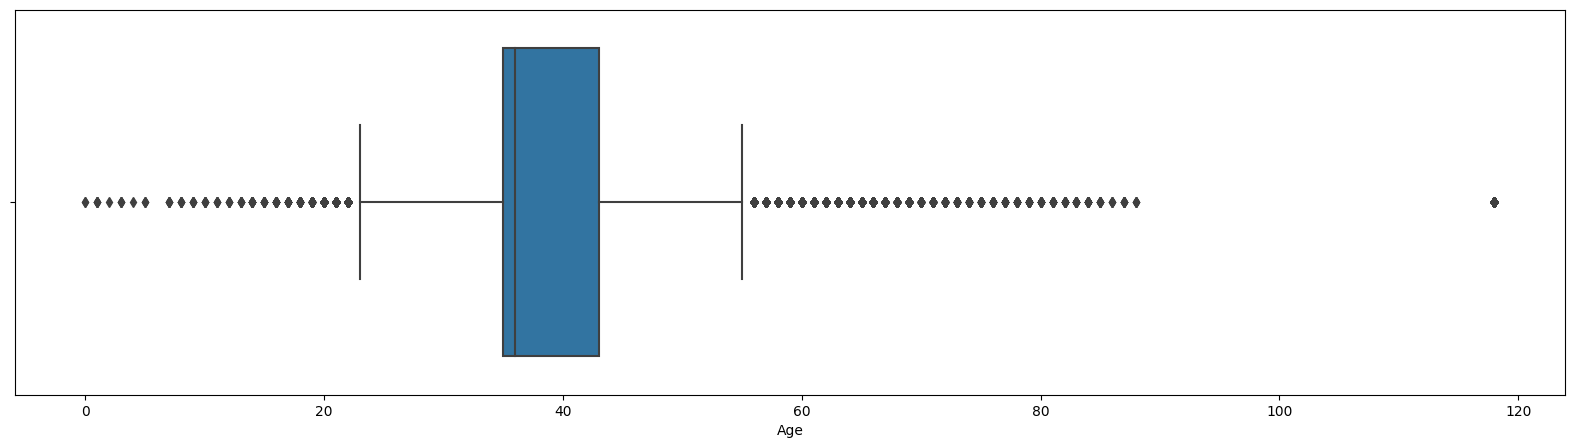

In [10]:
# exploramos outliers de la columa age:

plt.figure(figsize = (20,5))
sns.boxplot(data = df_travel, x = "Age");

<Axes: xlabel='Age', ylabel='Count'>

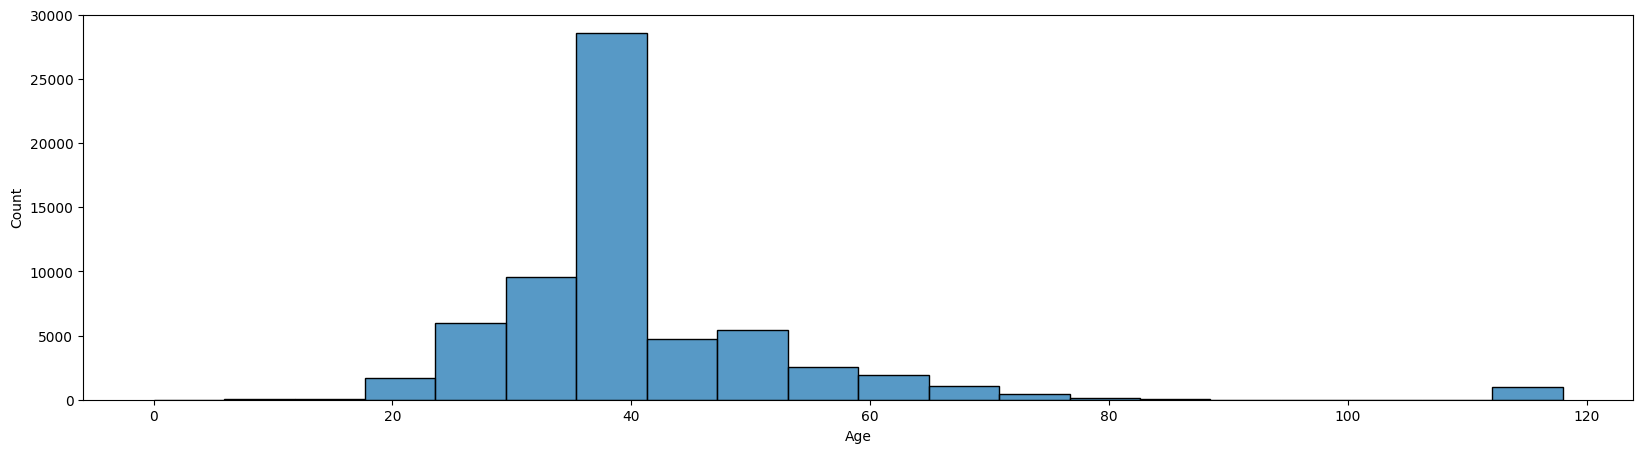

In [11]:
# exploramos la distribución de las edades

plt.figure(figsize = (20,5))
sns.histplot(data = df_travel, x = "Age", bins = 20)

Como vemos que los datos van disminuyendo en gran medida a medida que nos acercamos a los outliers, no los gestionaremos, salvo el valor de 118 años de edad que lo consideramos un error y lo sustituiremos.

In [12]:
df_travel["Age"].unique()

array([ 81,  71,  32,  41,  44,  29,  37, 118,  47,  48,  64,  36,  53,
        43,  58,  25,  34,  26,  30,  33,  35,  31,  61,  20,  46,  49,
        50,  62,  65,  24,  40,  21,  66,  57,  45,  52,  60,  27,  23,
        39,  59,  28,  67,  38,  72,  51,  55,  54,  69,  22,  78,  42,
        70,  68,  77,  63,  56,  79,  76,  16,  14,  73,  18,  19,  74,
        85,  84,  13,  75,  87,  80,  83,  12,  10,   8,  17,  15,   9,
        11,  86,   3,  82,   1,   5,  88,   2,   4,   0,   7], dtype=int64)

In [13]:
# Cambiamos los registros a np.nan para poder gestionarlos

df_travel['Age'] = df_travel['Age'].replace(118, np.nan)

In [14]:
# El outlier de 118 lo imputaremos mediante el método KNN para que nos lo cambie por la media de sus vecinos

imputerKNN = KNNImputer(n_neighbors=5)
imputerKNN.fit(df_travel[['Age']])
age_knn= imputerKNN.transform(df_travel[['Age']])
df_age = pd.DataFrame(age_knn, columns = ['Age'])

In [15]:
# cambiamos la columna en el df original

df_travel['Age'] = df_age['Age']

In [16]:
# comprobamos el valor completo que nos devuelve el método knn

pd.DataFrame(df_travel['Age'].value_counts()).index

Index([             36.0,              31.0,              48.0,
                    35.0,              30.0,              28.0,
                    29.0,              33.0,              32.0,
                    27.0,              34.0,              37.0,
                    26.0, 38.73836258060376,              39.0,
                    38.0,              45.0,              41.0,
                    43.0,              46.0,              42.0,
                    40.0,              44.0,              25.0,
                    47.0,              49.0,              53.0,
                    24.0,              51.0,              50.0,
                    52.0,              54.0,              57.0,
                    23.0,              56.0,              22.0,
                    55.0,              58.0,              59.0,
                    60.0,              61.0,              21.0,
                    63.0,              62.0,              64.0,
                    65.0,              6

In [17]:
# Redondeamos al alza el valor que hemos recibido de KNN

df_travel['Age'] = df_travel['Age'].apply(lambda col:math.ceil(col))

Exploramos nuestra variable respuesta:

In [18]:
value_counts = df_travel["Claim"].value_counts()

<Axes: ylabel='count'>

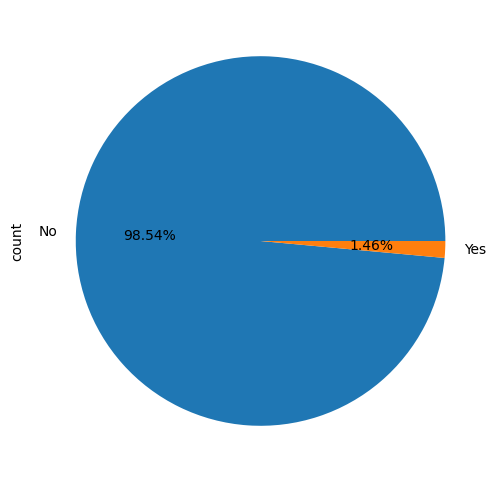

In [19]:
#Hacemos un pie de nuestra variable respuesta
value_counts.plot.pie(figsize=(6,6), autopct='%1.2f%%' )

CONCLUSIÓN: 

Nuestra variable respuesta no está balanceada, casi la totalidad de los datos corresponden a la subcategoría "no" (no presentaron reclamaciones)

In [20]:
# creamos dos df distintos: Uno para categóricas y otro para variables numéricas

df_num = df_travel.select_dtypes(include= np.number)
df_cat = df_travel.select_dtypes(exclude= np.number)

In [21]:
df_num

,Duration,Net Sales,Commision (in value),Age
0,186,-29.0,9.57,81
1,186,-29.0,9.57,71
2,65,-49.5,29.70,32
3,60,-39.6,23.76,32
4,79,-19.8,11.88,41
...,...,...,...,...
63321,111,35.0,12.25,31
63322,58,40.0,14.00,40
63323,2,18.0,6.30,57
63324,3,18.0,6.30,63


Exploramos Variables Predictoras:

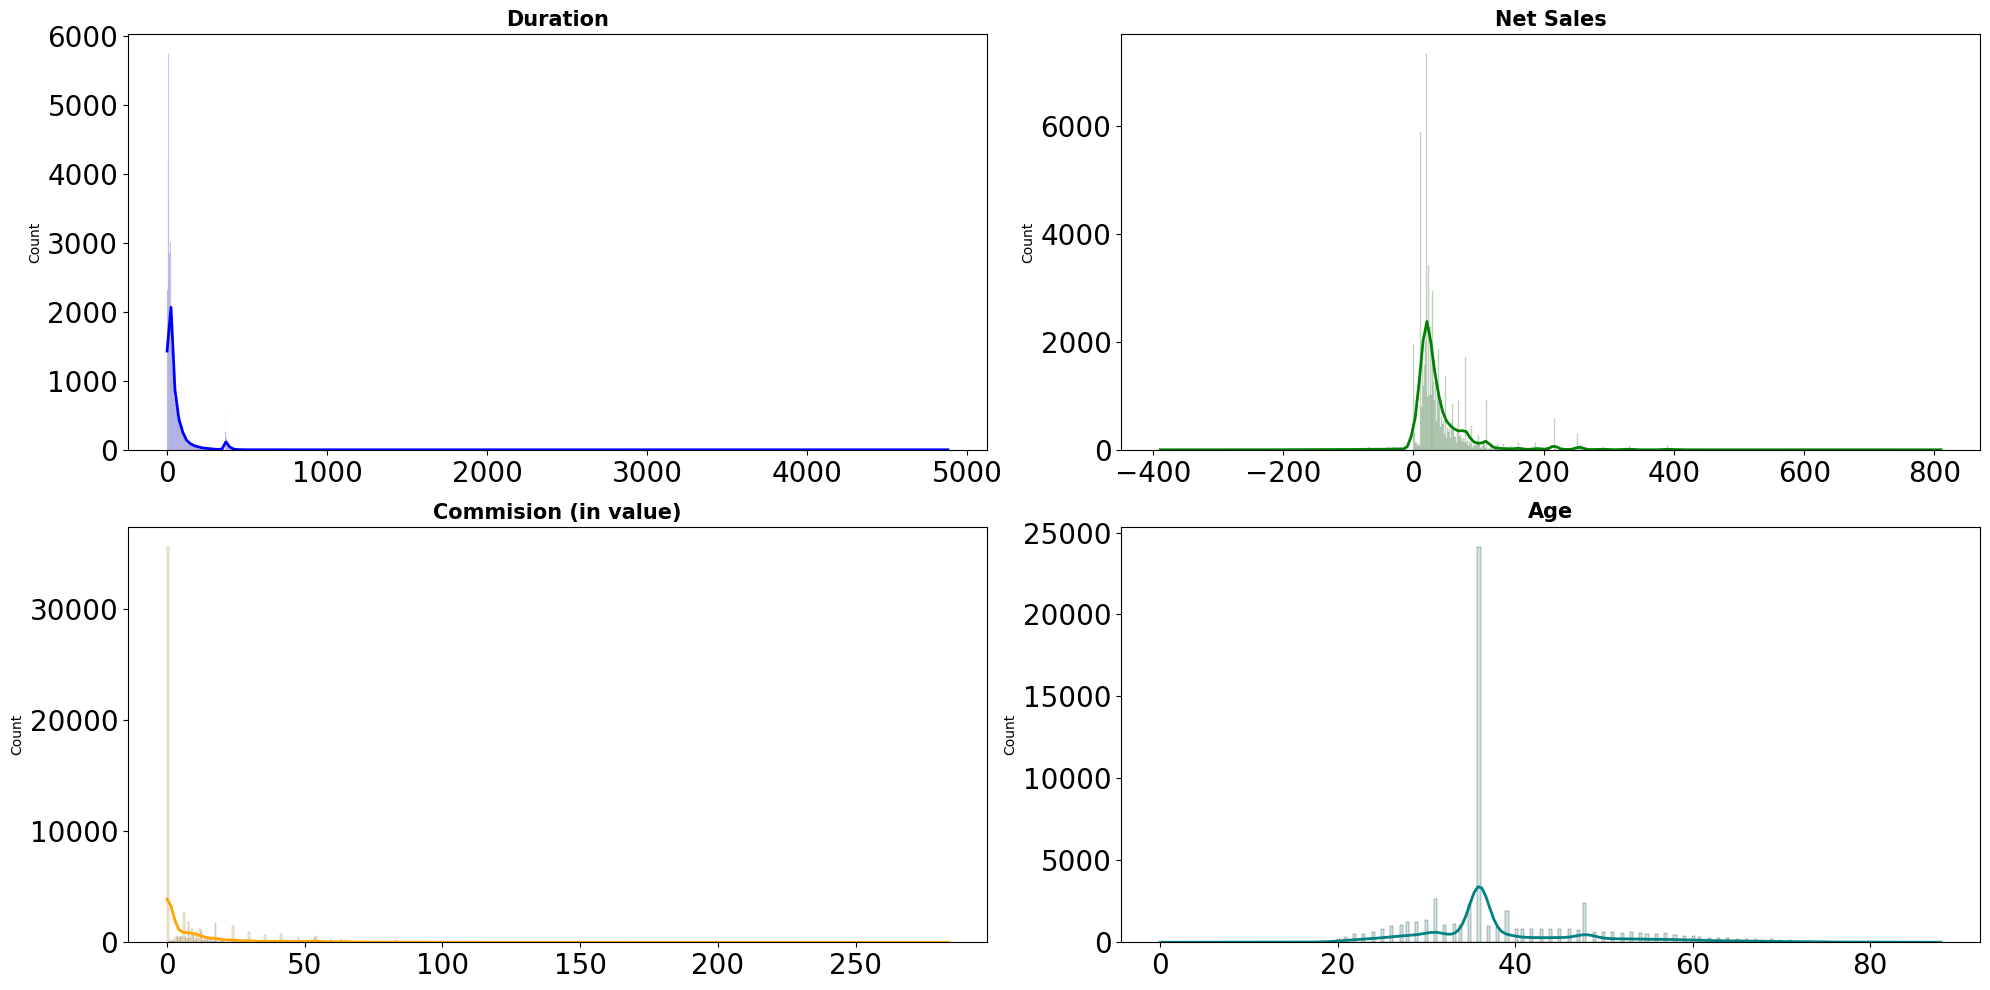

In [22]:
# NUMÉRICAS:

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 10))
lista_colores = ["blue", "green", "orange", "teal"]

axes = axes.flat
columnas_numeric = df_num.select_dtypes(include = np.number).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data = df_travel,
        x = colum,
        kde = True,
        color = lista_colores[i],
        line_kws = {"linewidth": 2},
        alpha = 0.2,
        ax = axes[i])
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
fig.tight_layout();

CONCLUSIONES:

- Vemos que hay valores inusuales en la duración de los viajes, net sales y en commisiones así que pasamos a explorarlos más tarde.

- Como ya habíamos visto, la edad media de los clientes está cerca al 36.

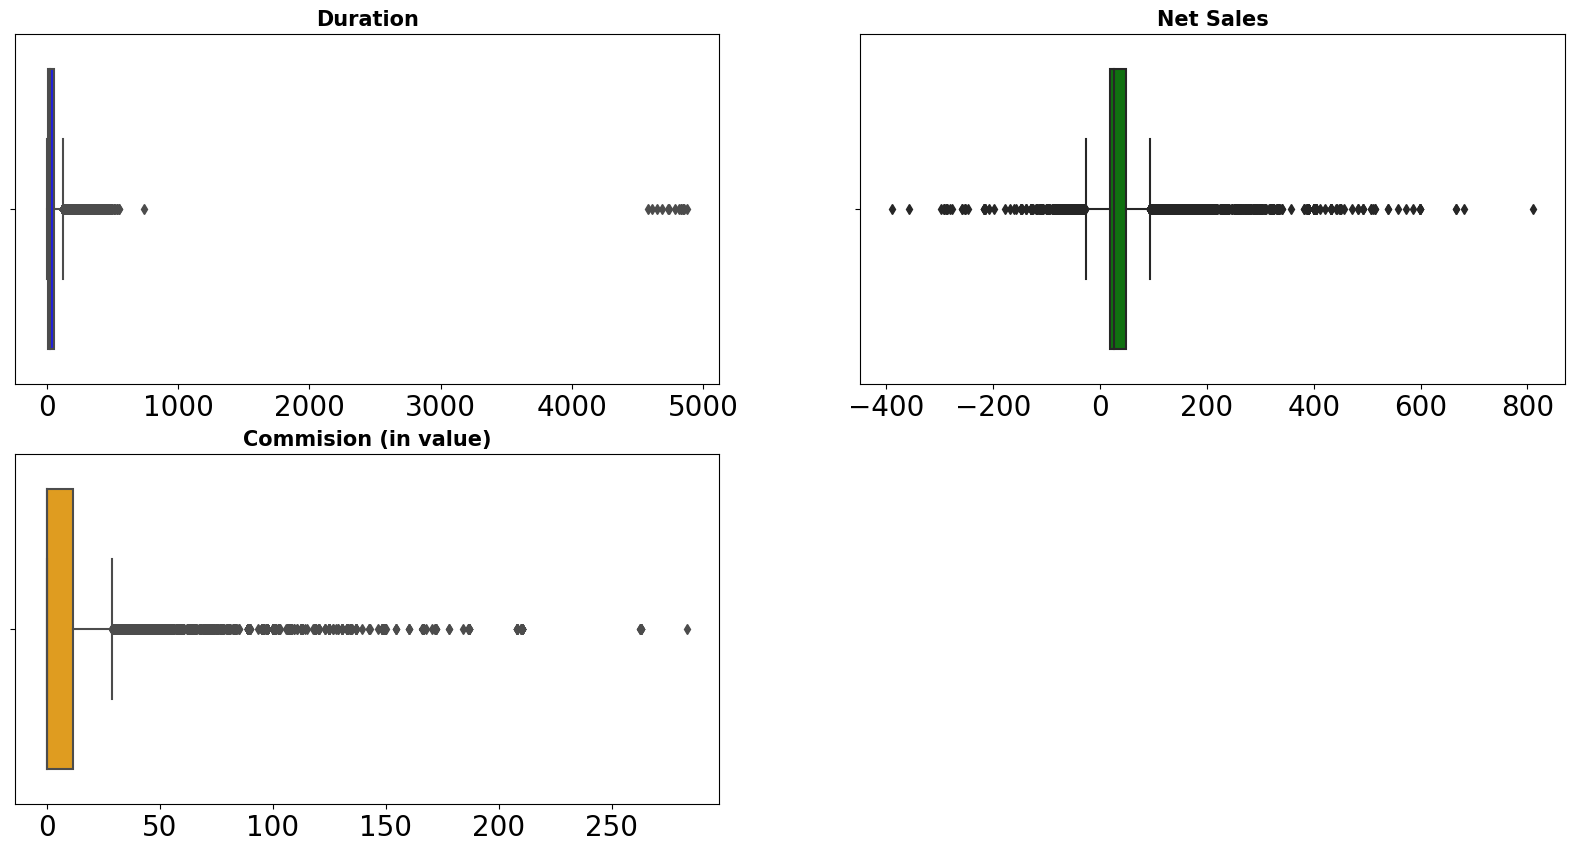

In [23]:
# exploramos outliers

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 10))
lista_colores = ["blue", "green", "orange", "teal"]

axes = axes.flat
columnas_numeric = df_num.select_dtypes(include = np.number).columns

for i, colum in enumerate(columnas_numeric):
    sns.boxplot(
        data = df_travel,
        x = colum,
        color = lista_colores[i],
        ax = axes[i])
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.delaxes(axes[-1]);

CONCLUSION:

- La duración del viaje obviamente hay valores que no son normales.¿son datos correctos? ¿pueden ser vuelos sólo de ida?

- En cuanto al net_value que es el dinero que la agencia recibe vemos bastantes negativos lo que nos hace pensar que puedan ser ofertas o descuentos donde la compañía no genera ingresos activos (quizás pasivos) o son datos incorrectos. ¿pueden ser seguros a sus propios empleados para conocer destinos?

- Las comisiones de las aseguradoras mayoritariamentos son nulas. Nos hace pensar que sería recomdable hacer dos estudios o separarlas por dos grupos (con comisión y sin comisión)

In [61]:
# creamos una funcion para categorizar las comisiones y, de paso, para gestionar los outliers

def cat (col):

    """Esta función nos categoriza la columna que elijamos

    Returns:
        no: cambia todos los 0 por no
        yes: cambia cualquier valor por yes
    """

    if col == 0:

        return "no"
    
    else:
        return "yes"

In [62]:
df_travel["Commision"] = df_travel["Commision (in value)"].apply(cat)

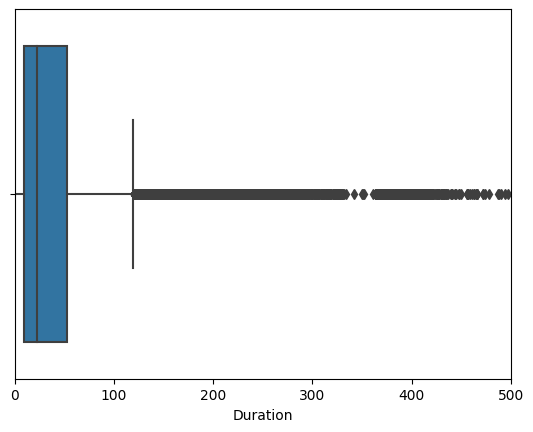

In [24]:
# analizamos más a fondo la columna Duration

sns.boxplot(x= "Duration", data= df_travel)
plt.xlim([0, 500]);

In [44]:
df_travel[df_travel["Duration"] > 365].count()

Agency                  1329
Agency Type             1329
Distribution Channel    1329
Product Name            1329
Claim                   1329
Duration                1329
Destination             1329
Net Sales               1329
Commision (in value)    1329
Age                     1329
dtype: int64

Eliminamos los utliers que pasen de 1 año, teniendo en cuenta visados de estudiantes o de trabajo que suelen pedir viaje de vuelta. Además, por lo general, no se venden billetes a más de un año vista.

In [45]:
# sacamos los indices de los outliers y los eliminamos del df

lista_365= df_travel[df_travel["Duration"] > 365].index.tolist()
df_travel = df_travel.drop(df_travel.index[lista_365])

In [52]:
# corroboramos que se han eliminado

df_travel.shape

(61997, 10)

<Axes: xlabel='Net Sales'>

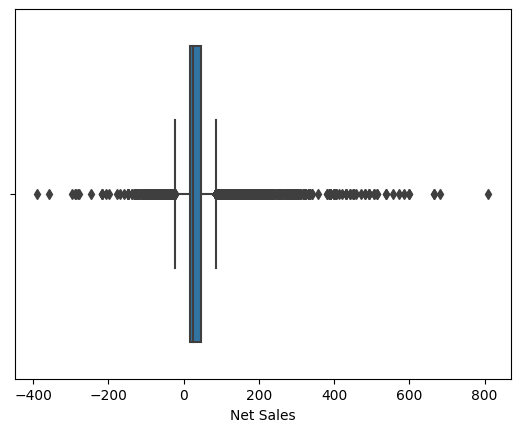

In [50]:
# exploramos los outliers de la columna Net Sales

sns.boxplot(x= "Net Sales", data= df_travel)

In [71]:
df_num.stb.freq(["Net Sales"])

,Net Sales,count,percent,cumulative_count,cumulative_percent
0,20.0,5988,9.455832,5988,9.455832
1,10.0,4748,7.497710,10736,16.953542
2,22.0,2343,3.699902,13079,20.653444
3,0.0,1884,2.975081,14963,23.628525
4,18.0,1643,2.594511,16606,26.223036
...,...,...,...,...,...
1134,-287.4,1,0.001579,63322,99.993683
1135,-289.0,1,0.001579,63323,99.995263
1136,-297.0,1,0.001579,63324,99.996842
1137,-357.5,1,0.001579,63325,99.998421


<Axes: >

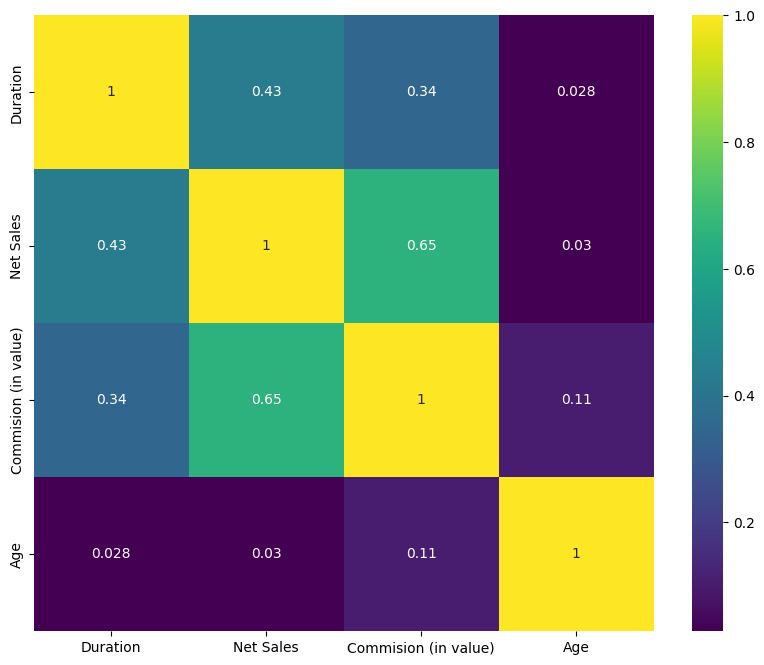

In [49]:
plt.figure(figsize=(10,8))

sns.heatmap(df_num.corr(), cmap="viridis", annot= True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


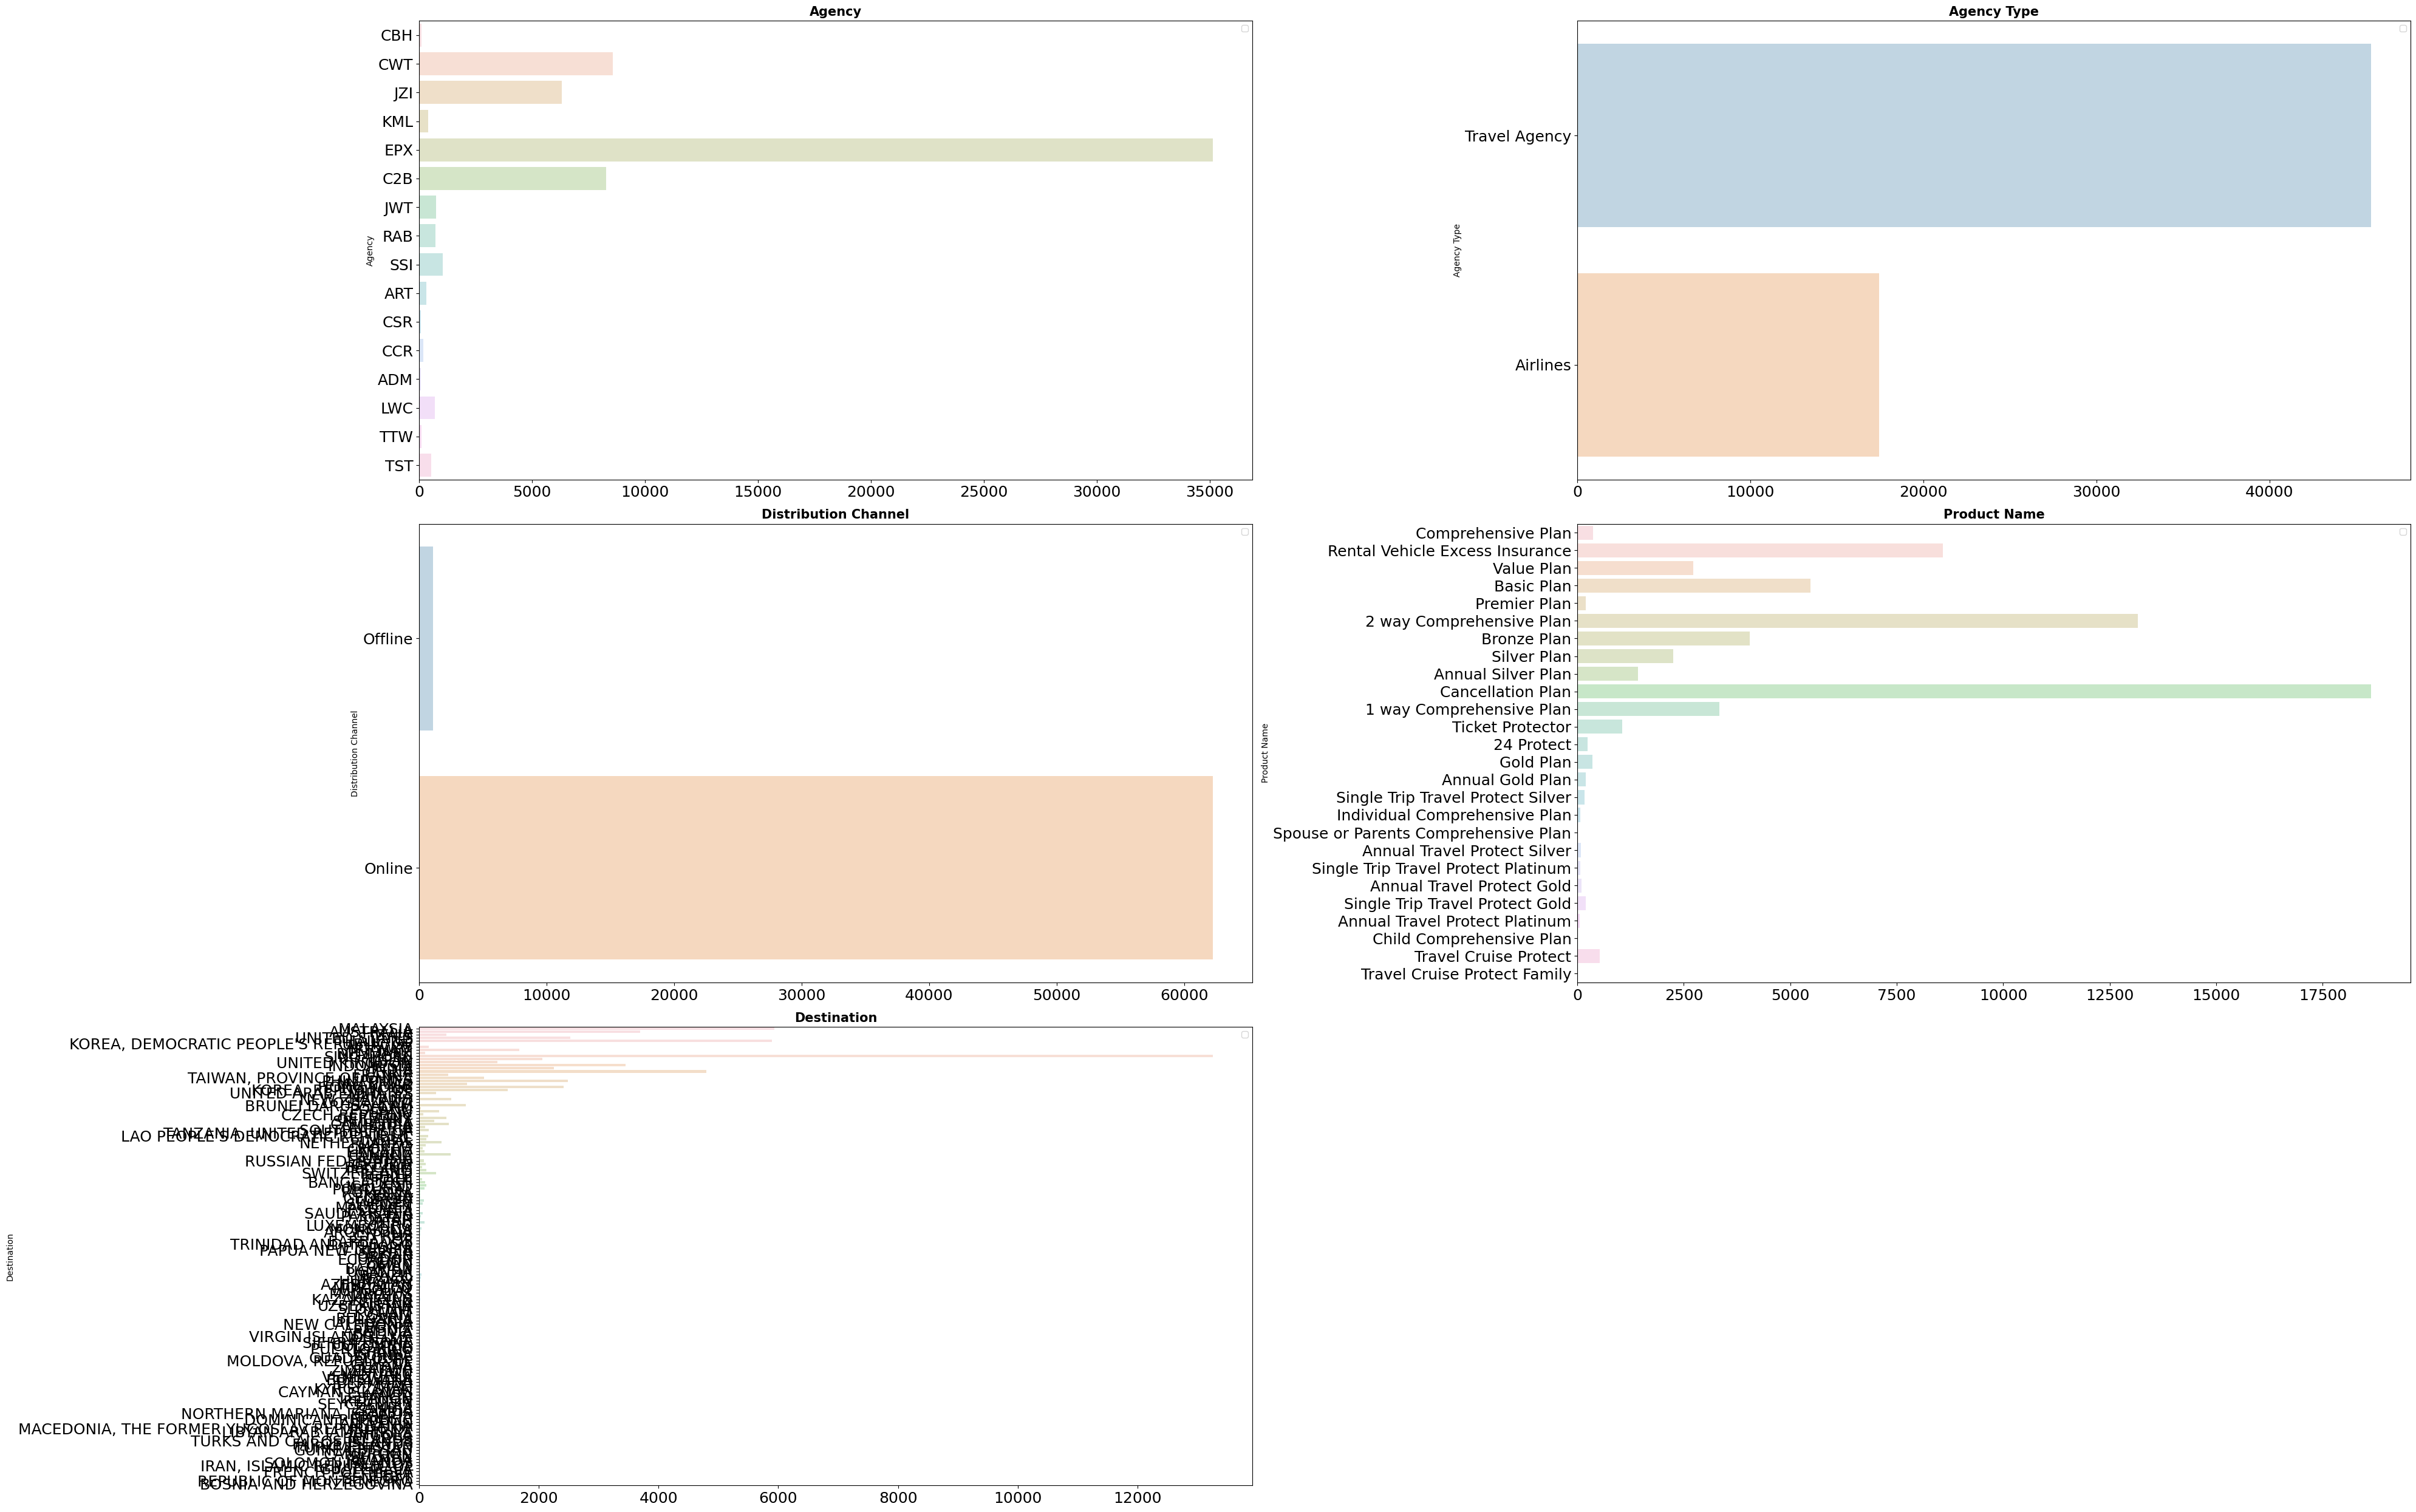

In [29]:
# CATEGÓRICAS:

fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (40, 25))
axes = axes.flat

columnas_cat = df_cat.drop("Claim", axis= 1).columns

for i, colum in enumerate(columnas_cat):
    sns.countplot(
        data = df_travel,
        y = colum,
        alpha = 0.3,
        ax = axes[i])
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 18)
    axes[i].set_xlabel("")
    axes[i].legend(loc= "upper right")

fig.tight_layout()
fig.delaxes(axes[-1]);

CONCLUSIONES:


- La agencia que más se contrata es EPX

- El tipo de agencia más usado según esto datos claramente es la agencia de viajes de manera online

- Los productos más contratados son el plan de cancelación y el 2 way comprehensive plan así como el rental vehicle excess insurance

- Se debe profundizar en la columna destinatio. ¿Hay repetidos? ¿se pueden agrupar?